# Apply and Visualize UMAP

**Gregory Way, 2019**

We are interested in visualizing the relationship among samples according to several variables.
These variables include `batch`, `dosage`, and `cell line`.

In [1]:
import os
import numpy as np
import pandas as pd
import umap

import plotnine as gg

from pycytominer import feature_select
from pycytominer.cyto_utils import infer_cp_features

In [2]:
%matplotlib inline

In [3]:
np.random.seed(123)

In [4]:
def process_umap(data_df):    
    # Prepare UMAP input by removing metadata columns
    metadata_cols = infer_cp_features(data_df, metadata=True)

    metadata_df = data_df.loc[:, metadata_cols]
    umap_data_df = data_df.drop(metadata_cols, axis="columns")
    
    # Apply UMAP
    reducer = umap.UMAP(random_state=123)
    embedding = reducer.fit_transform(umap_data_df)
    
    # Setup plotting logic
    embedding_df = pd.DataFrame(embedding, columns=['x', 'y'])
    embedding_df = embedding_df.merge(metadata_df, left_index=True, right_index=True)
    
    return embedding_df

In [5]:
save_file_extensions = ['.png']

## For Combined Batches of Four WT + Resistant Clones

In [6]:
# Load and process data
file = os.path.join("data", "merged", "combined_four_clone_dataset_feature_select.csv.gz")
fourclone_data_df = pd.read_csv(file)

embedding_df = process_umap(fourclone_data_df)
embedding_df.head()

/Users/gway/miniconda3/envs/resistance-mechanisms/lib/python3.7/site-packages/umap/rp_tree.py:439: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "make_euclidean_tree" failed type inference due to: Cannot unify RandomProjectionTreeNode(array(int64, 1d, C), bool, none, none, none, none) and RandomProjectionTreeNode(none, bool, array(float32, 1d, C), float64, RandomProjectionTreeNode(array(int64, 1d, C), bool, none, none, none, none), RandomProjectionTreeNode(array(int64, 1d, C), bool, none, none, none, none)) for '$46call_function.15', defined at /Users/gway/miniconda3/envs/resistance-mechanisms/lib/python3.7/site-packages/umap/rp_tree.py (446)

File "../../../../../../../miniconda3/envs/resistance-mechanisms/lib/python3.7/site-packages/umap/rp_tree.py", line 446:
def make_euclidean_tree(data, indices, rng_state, leaf_size=30):
    <source elided>

        left_node = make_euclidean_tree(data, left_indices, rng_state, leaf_size)
     

,x,y,Metadata_Plate,Metadata_Site,Metadata_Well,Metadata_batch,Metadata_cell_count,Metadata_clone_number,Metadata_plate_ID,Metadata_plate_filename,Metadata_plate_map_name,Metadata_treatment,Metadata_clone_type
0,2.616813,3.179430,217760,1,B02,2019_11_20_Batch6,2057,BZ017,217760,20191120-20191115-HiDensity,217760,DMSO,resistant
1,2.395950,3.308357,217760,2,B02,2019_11_20_Batch6,1888,BZ017,217760,20191120-20191115-HiDensity,217760,DMSO,resistant
2,2.681635,3.095245,217760,3,B02,2019_11_20_Batch6,2107,BZ017,217760,20191120-20191115-HiDensity,217760,DMSO,resistant
3,1.214557,3.114065,217760,4,B02,2019_11_20_Batch6,1765,BZ017,217760,20191120-20191115-HiDensity,217760,DMSO,resistant
4,1.399585,3.521791,217760,5,B02,2019_11_20_Batch6,1665,BZ017,217760,20191120-20191115-HiDensity,217760,DMSO,resistant


## Visualize a Series of UMAP Representations

/Users/gway/miniconda3/envs/resistance-mechanisms/lib/python3.7/site-packages/plotnine/ggplot.py:706: UserWarning: Saving 5.5 x 5 in image.
  from_inches(height, units), units))
/Users/gway/miniconda3/envs/resistance-mechanisms/lib/python3.7/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: figures/umap/four_clone_umap_site_effect.png
  warn('Filename: {}'.format(filename))


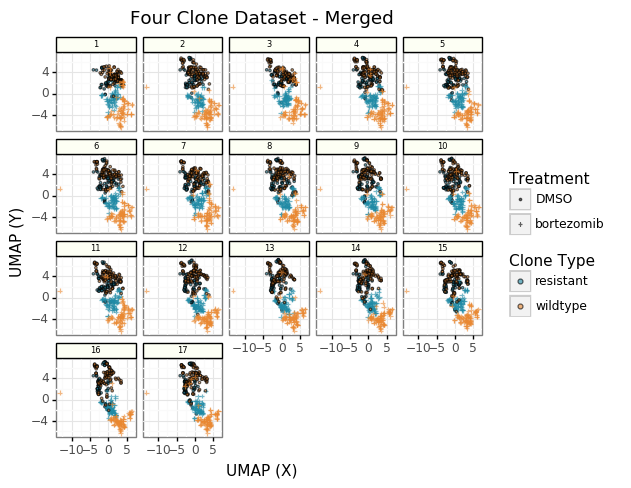

<ggplot: (-9223372036547633180)>

In [7]:
umap_site_differences_gg = (
    gg.ggplot(embedding_df, gg.aes(x="x", y="y"))
    + gg.geom_point(
        gg.aes(fill="Metadata_clone_type", shape="Metadata_treatment"),
        color='black', alpha=0.6)
    + gg.theme_bw()
    + gg.xlab("UMAP (X)")
    + gg.ylab("UMAP (Y)")
    + gg.ggtitle("Four Clone Dataset - Merged")
    + gg.scale_shape_manual(name="Treatment", values=[".", "+"])
    + gg.scale_fill_manual(name="Clone Type", values=["#1F8AA5", "#E98831"])
    + gg.facet_wrap("~Metadata_Site")
    + gg.theme(
        strip_text=gg.element_text(size=6, color="black"),
        strip_background=gg.element_rect(colour="black", fill="#fdfff4"),
    )
)

file = os.path.join("figures", "umap", "four_clone_umap_site_effect")
for extension in save_file_extensions:
    umap_site_differences_gg.save(filename='{}{}'.format(file, extension), height=5, width=5.5, dpi=400)

umap_site_differences_gg

/Users/gway/miniconda3/envs/resistance-mechanisms/lib/python3.7/site-packages/plotnine/ggplot.py:706: UserWarning: Saving 3.5 x 3 in image.
  from_inches(height, units), units))
/Users/gway/miniconda3/envs/resistance-mechanisms/lib/python3.7/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: figures/umap/four_clone_umap_resistant_type.png
  warn('Filename: {}'.format(filename))


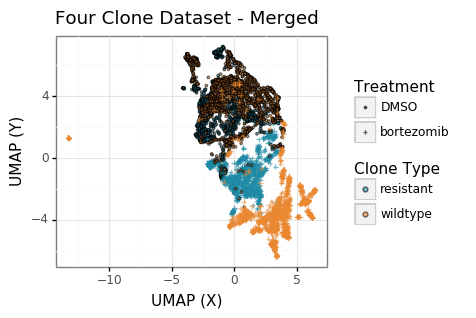

<ggplot: (-9223372036551571873)>

In [8]:
umap_resistant_type_gg = (
    gg.ggplot(embedding_df, gg.aes(x="x", y="y"))
    + gg.geom_point(
        gg.aes(fill="Metadata_clone_type", shape="Metadata_treatment"),
        color='black', alpha=0.6)
    + gg.theme_bw()
    + gg.xlab("UMAP (X)")
    + gg.ylab("UMAP (Y)")
    + gg.ggtitle("Four Clone Dataset - Merged")
    + gg.scale_shape_manual(name="Treatment", values=[".", "+"])
    + gg.scale_fill_manual(name="Clone Type", values=["#1F8AA5", "#E98831"])
)

file = os.path.join("figures", "umap", "four_clone_umap_resistant_type")
for extension in save_file_extensions:
    umap_resistant_type_gg.save(filename='{}{}'.format(file, extension), height=3, width=3.5, dpi=400)

umap_resistant_type_gg

/Users/gway/miniconda3/envs/resistance-mechanisms/lib/python3.7/site-packages/plotnine/ggplot.py:706: UserWarning: Saving 3.5 x 3 in image.
  from_inches(height, units), units))
/Users/gway/miniconda3/envs/resistance-mechanisms/lib/python3.7/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: figures/umap/four_clone_umap_cell_count.png
  warn('Filename: {}'.format(filename))


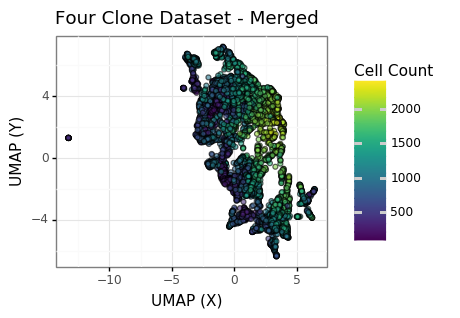

<ggplot: (303396486)>

In [9]:
umap_cell_count_gg = (
    gg.ggplot(
        embedding_df.rename({"Metadata_cell_count": "Cell Count"}, axis="columns")
    )
    + gg.geom_point(
        gg.aes(x="x", y="y", fill="Cell Count"),
        color='black', alpha=0.6)
    + gg.theme_bw()
    + gg.xlab("UMAP (X)")
    + gg.ylab("UMAP (Y)")
    + gg.ggtitle("Four Clone Dataset - Merged")
)

file = os.path.join("figures", "umap", "four_clone_umap_cell_count")
for extension in save_file_extensions:
    umap_cell_count_gg.save(filename='{}{}'.format(file, extension), height=3, width=3.5, dpi=400)
    
umap_cell_count_gg

/Users/gway/miniconda3/envs/resistance-mechanisms/lib/python3.7/site-packages/plotnine/ggplot.py:706: UserWarning: Saving 3.5 x 3 in image.
  from_inches(height, units), units))
/Users/gway/miniconda3/envs/resistance-mechanisms/lib/python3.7/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: figures/umap/four_clone_umap_batch.png
  warn('Filename: {}'.format(filename))


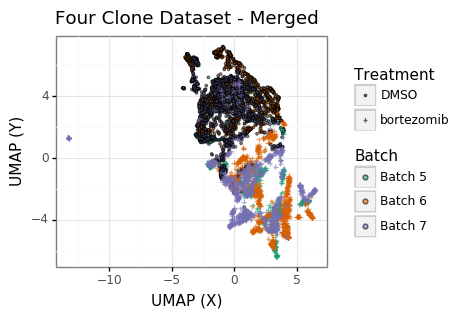

<ggplot: (309840332)>

In [10]:
umap_batch_gg = (
    gg.ggplot(embedding_df, gg.aes(x="x", y="y"))
    + gg.geom_point(
        gg.aes(fill="Metadata_batch", shape="Metadata_treatment"),
        color='black',
        alpha=0.6
    )
    + gg.theme_bw()
    + gg.xlab("UMAP (X)")
    + gg.ylab("UMAP (Y)")
    + gg.ggtitle("Four Clone Dataset - Merged")
    + gg.scale_shape_manual(name="Treatment", values=[".", "+"])
    + gg.scale_fill_manual(
        name="Batch",
        values=["#1b9e77", "#d95f02", "#7570b3"],
        labels=['Batch 5', "Batch 6", "Batch 7"]
    )
)

file = os.path.join("figures", "umap", "four_clone_umap_batch")
for extension in save_file_extensions:
    umap_batch_gg.save(filename='{}{}'.format(file, extension), height=3, width=3.5, dpi=400)

umap_batch_gg

/Users/gway/miniconda3/envs/resistance-mechanisms/lib/python3.7/site-packages/plotnine/ggplot.py:706: UserWarning: Saving 3.5 x 3 in image.
  from_inches(height, units), units))
/Users/gway/miniconda3/envs/resistance-mechanisms/lib/python3.7/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: figures/umap/four_clone_umap_plate_facet.png
  warn('Filename: {}'.format(filename))


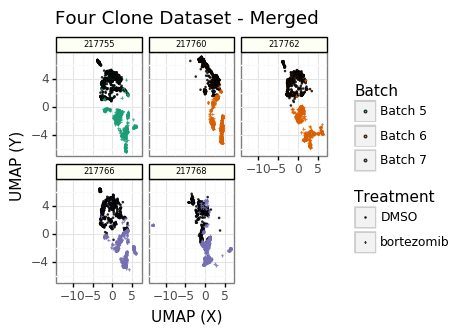

<ggplot: (304466061)>

In [11]:
umap_batch_facet_gg = (
    gg.ggplot(embedding_df, gg.aes(x="x", y="y"))
     + gg.geom_point(
        gg.aes(fill="Metadata_batch", shape="Metadata_treatment"),
        color='black',
        alpha=0.8,
        size=0.6
    )
    + gg.theme_bw()
    + gg.xlab("UMAP (X)")
    + gg.ylab("UMAP (Y)")
    + gg.ggtitle("Four Clone Dataset - Merged")
    + gg.facet_wrap("~Metadata_plate_ID")
    + gg.scale_fill_manual(
        name="Batch",
        values=["#1b9e77", "#d95f02", "#7570b3"],
        labels=['Batch 5', "Batch 6", "Batch 7"]
    )
    + gg.scale_shape_manual(name="Treatment", values=[".", "+"])
    + gg.theme(
        strip_text=gg.element_text(size=6, color="black"),
        strip_background=gg.element_rect(colour="black", fill="#fdfff4"),
    )
)
    
file = os.path.join("figures", "umap", "four_clone_umap_plate_facet")
for extension in save_file_extensions:
    umap_batch_facet_gg.save(filename='{}{}'.format(file, extension), height=3, width=3.5, dpi=400)

umap_batch_facet_gg

/Users/gway/miniconda3/envs/resistance-mechanisms/lib/python3.7/site-packages/plotnine/ggplot.py:706: UserWarning: Saving 4.5 x 4 in image.
  from_inches(height, units), units))
/Users/gway/miniconda3/envs/resistance-mechanisms/lib/python3.7/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: figures/umap/four_clone_umap_facet_clone_sample.png
  warn('Filename: {}'.format(filename))


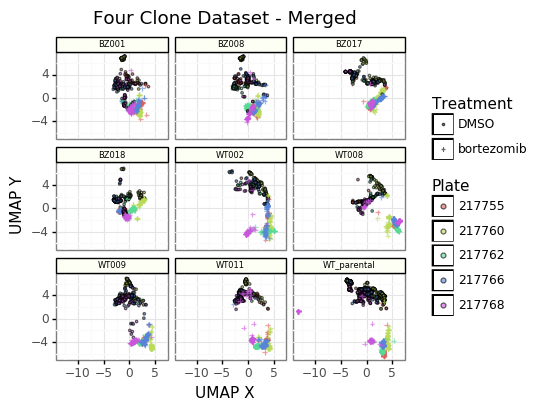

<ggplot: (310171228)>

In [12]:
# Visualize UMAP results
clone_facet_gg = (
    gg.ggplot(embedding_df, gg.aes('x', 'y'))
    + gg.geom_point(
        gg.aes(fill='factor(Metadata_Plate)', shape="Metadata_treatment"),
        alpha=0.6
    )
    + gg.theme_bw()
    + gg.xlab("UMAP X")
    + gg.ylab("UMAP Y")
    + gg.scale_shape_manual(name="Treatment", values=[".", "+"])
    + gg.scale_fill_discrete(name="Plate")
    + gg.facet_wrap("~Metadata_clone_number")
    + gg.ggtitle("Four Clone Dataset - Merged")
    + gg.theme(
        legend_key=gg.element_rect(color="black", fill = "white"),
        strip_text=gg.element_text(size=6, color="black"),
        strip_background=gg.element_rect(colour="black", fill="#fdfff4")
    )
)
    
file = os.path.join("figures", "umap", "four_clone_umap_facet_clone_sample")
for extension in save_file_extensions:
    clone_facet_gg.save(filename='{}{}'.format(file, extension), height=4, width=4.5, dpi=400)

clone_facet_gg

/Users/gway/miniconda3/envs/resistance-mechanisms/lib/python3.7/site-packages/plotnine/ggplot.py:706: UserWarning: Saving 3.5 x 3 in image.
  from_inches(height, units), units))
/Users/gway/miniconda3/envs/resistance-mechanisms/lib/python3.7/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: figures/umap/four_clone_umap_clone_sample.png
  warn('Filename: {}'.format(filename))


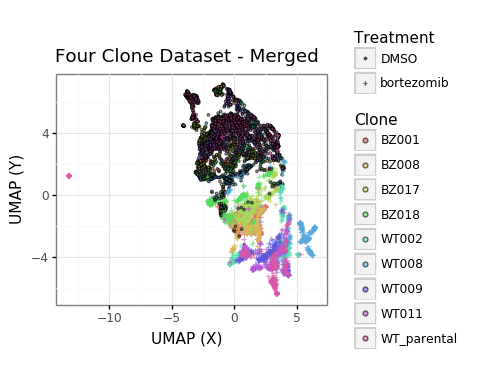

<ggplot: (-9223372036541170379)>

In [13]:
umap_well_embedding_gg = (
    gg.ggplot(embedding_df, gg.aes(x="x", y="y"))
    + gg.geom_point(
        gg.aes(fill="Metadata_clone_number", shape="Metadata_treatment"),
        color='black', alpha=0.6
    )
    + gg.theme_bw()
    + gg.scale_shape_manual(name="Treatment", values=[".", "+"])
    + gg.scale_fill_discrete(name="Clone")
    + gg.xlab("UMAP (X)")
    + gg.ylab("UMAP (Y)")
    + gg.ggtitle("Four Clone Dataset - Merged")
)

file = os.path.join("figures", "umap", "four_clone_umap_clone_sample")
for extension in save_file_extensions:
    umap_well_embedding_gg.save(filename='{}{}'.format(file, extension), height=3, width=3.5, dpi=400)

umap_well_embedding_gg

## For Clone A and E Data

In [14]:
# Load and process data
file = os.path.join("data", "merged", "combined_cloneAcloneE_dataset_feature_select.csv.gz")
cloneAE_data_df = pd.read_csv(file)

embedding_cloneAE_df = process_umap(cloneAE_data_df)
embedding_cloneAE_df.head()

/Users/gway/miniconda3/envs/resistance-mechanisms/lib/python3.7/site-packages/umap/umap_.py:328: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "fuzzy_simplicial_set" failed type inference due to: Untyped global name 'nearest_neighbors': cannot determine Numba type of <class 'function'>

File "../../../../../../../miniconda3/envs/resistance-mechanisms/lib/python3.7/site-packages/umap/umap_.py", line 446:
def fuzzy_simplicial_set(
    <source elided>
    if knn_indices is None or knn_dists is None:
        knn_indices, knn_dists, _ = nearest_neighbors(
        ^

  @numba.jit()
/Users/gway/miniconda3/envs/resistance-mechanisms/lib/python3.7/site-packages/numba/object_mode_passes.py:178: NumbaWarning: Function "fuzzy_simplicial_set" was compiled in object mode without forceobj=True.

File "../../../../../../../miniconda3/envs/resistance-mechanisms/lib/python3.7/site-packages/umap/umap_.py", line 329:
@numba.jit()
def fuzzy_simplicial_s

,x,y,Metadata_CellLine,Metadata_Dosage,Metadata_Plate,Metadata_Site,Metadata_Well,Metadata_batch,Metadata_cell_count,Metadata_plate_map_name,Metadata_clone_type
0,-3.801764,-3.641595,WT,0.0,207106_exposure320,1,B02,2019_03_20_Batch2,858,PlateMap_207106_exposure320,wildtype
1,-3.878264,-3.479764,WT,0.0,207106_exposure320,2,B02,2019_03_20_Batch2,1000,PlateMap_207106_exposure320,wildtype
2,-4.210264,-3.500491,WT,0.0,207106_exposure320,3,B02,2019_03_20_Batch2,892,PlateMap_207106_exposure320,wildtype
3,-3.950318,-3.544523,WT,0.0,207106_exposure320,4,B02,2019_03_20_Batch2,997,PlateMap_207106_exposure320,wildtype
4,-4.052408,-3.489848,WT,0.0,207106_exposure320,5,B02,2019_03_20_Batch2,803,PlateMap_207106_exposure320,wildtype


/Users/gway/miniconda3/envs/resistance-mechanisms/lib/python3.7/site-packages/plotnine/ggplot.py:706: UserWarning: Saving 3.5 x 3 in image.
  from_inches(height, units), units))
/Users/gway/miniconda3/envs/resistance-mechanisms/lib/python3.7/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: figures/umap/cloneAE_umap.png
  warn('Filename: {}'.format(filename))


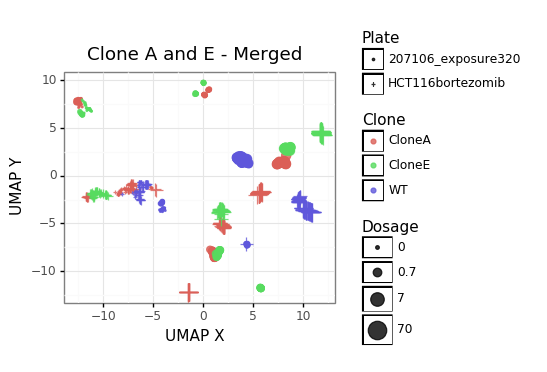

<ggplot: (306823488)>

In [15]:
# Visualize UMAP results
clone_ae_umap_gg = (
    gg.ggplot(embedding_cloneAE_df)
    + gg.geom_point(
        gg.aes('x', 'y',
               shape="Metadata_Plate", 
               size='factor(Metadata_Dosage)',
               color="Metadata_CellLine"),
        alpha=0.8
    )
    + gg.theme_bw()
    + gg.scale_shape_manual(name="Plate", values=[".", "+"])
    + gg.scale_color_discrete(name="Clone")
    + gg.scale_size_manual(name="Dosage", values=[1, 3, 5, 7])
    + gg.xlab("UMAP X")
    + gg.ylab("UMAP Y")
    + gg.ggtitle("Clone A and E - Merged")
    + gg.theme(
        legend_key=gg.element_rect(color="black", fill = "white"),
        strip_background=gg.element_rect(colour="black", fill="#fdfff4")
    )
)

file = os.path.join("figures", "umap", "cloneAE_umap")
for extension in save_file_extensions:
    clone_ae_umap_gg.save(
        filename='{}{}'.format(file, extension), height=3, width=3.5, dpi=400
    )

clone_ae_umap_gg

/Users/gway/miniconda3/envs/resistance-mechanisms/lib/python3.7/site-packages/plotnine/ggplot.py:706: UserWarning: Saving 5.5 x 5 in image.
  from_inches(height, units), units))
/Users/gway/miniconda3/envs/resistance-mechanisms/lib/python3.7/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: figures/umap/cloneAE_umap_site_effect.png
  warn('Filename: {}'.format(filename))


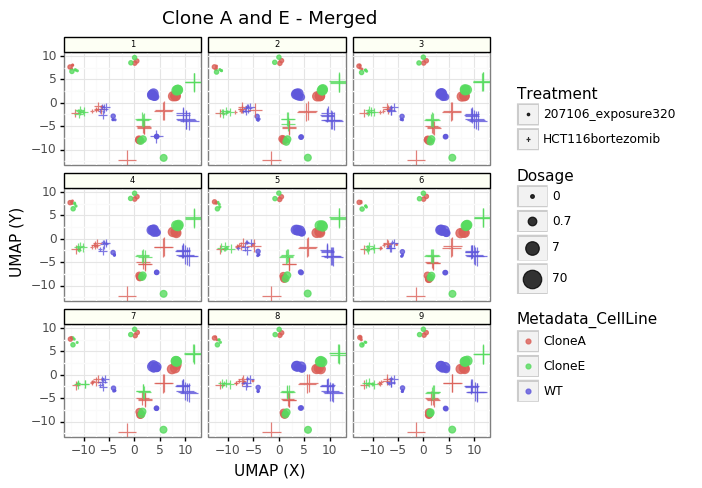

<ggplot: (315567231)>

In [16]:
clone_ae_umap_site_differences_gg = (
    gg.ggplot(embedding_cloneAE_df, gg.aes(x="x", y="y"))
    + gg.geom_point(
        gg.aes('x', 'y',
               shape="Metadata_Plate", 
               size='factor(Metadata_Dosage)',
               color="Metadata_CellLine"),
        alpha=0.8
    )
    + gg.theme_bw()
    + gg.xlab("UMAP (X)")
    + gg.ylab("UMAP (Y)")
    + gg.ggtitle("Clone A and E - Merged")
    + gg.scale_shape_manual(name="Treatment", values=[".", "+"])
    + gg.scale_fill_manual(name="Clone Type", values=["#1F8AA5", "#E98831"])
    + gg.facet_wrap("~Metadata_Site")
    + gg.scale_size_manual(name="Dosage", values=[1, 3, 5, 7])
    + gg.theme(
        strip_text=gg.element_text(size=6, color="black"),
        strip_background=gg.element_rect(colour="black", fill="#fdfff4"),
    )
)

file = os.path.join("figures", "umap", "cloneAE_umap_site_effect")
for extension in save_file_extensions:
    clone_ae_umap_site_differences_gg.save(filename='{}{}'.format(file, extension), height=5, width=5.5, dpi=400)

clone_ae_umap_site_differences_gg

/Users/gway/miniconda3/envs/resistance-mechanisms/lib/python3.7/site-packages/plotnine/ggplot.py:706: UserWarning: Saving 3.5 x 3 in image.
  from_inches(height, units), units))
/Users/gway/miniconda3/envs/resistance-mechanisms/lib/python3.7/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: figures/umap/cloneAE_umap_cell_count.png
  warn('Filename: {}'.format(filename))


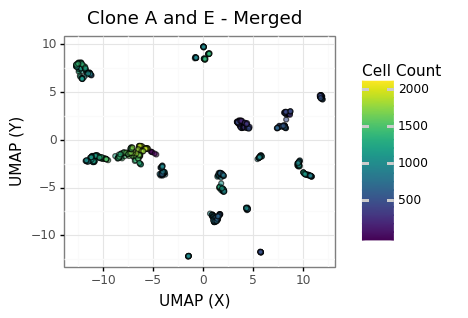

<ggplot: (-9223372036562651574)>

In [17]:
clone_ae_umap_cell_count_gg = (
    gg.ggplot(
        embedding_cloneAE_df.rename({"Metadata_cell_count": "Cell Count"}, axis="columns")
    )
    + gg.geom_point(
        gg.aes(x="x", y="y", fill="Cell Count"),
        color='black', alpha=0.6)
    + gg.theme_bw()
    + gg.xlab("UMAP (X)")
    + gg.ylab("UMAP (Y)")
    + gg.ggtitle("Clone A and E - Merged")
)

file = os.path.join("figures", "umap", "cloneAE_umap_cell_count")
for extension in save_file_extensions:
    clone_ae_umap_cell_count_gg.save(
        filename='{}{}'.format(file, extension), height=3, width=3.5, dpi=400
    )
    
clone_ae_umap_cell_count_gg

## Merged Data

In [18]:
drop_cols = ["Metadata_plate_ID", "Metadata_plate_filename"]

fourclone_data_recode_df = (
    fourclone_data_df
    .drop(drop_cols, axis="columns")
    .rename(
        {
            "Metadata_clone_number": "Metadata_CellLine"
        }, axis="columns"
    )
    .assign(Metadata_Dosage=0.7)
    .assign(Metadata_Dataset="FourClone")
)

cloneAE_data_recode_df = (
    cloneAE_data_df.assign(Metadata_treatment="bortezomib")
    .assign(Metadata_Dataset="CloneAE")
)

cloneAE_data_recode_df.loc[cloneAE_data_recode_df.Metadata_Dosage == 0, "Metadata_treatment"] = "DMSO"

In [19]:
combined_df = pd.concat([fourclone_data_recode_df, cloneAE_data_recode_df], sort=True).reset_index(drop=True)
combined_df = feature_select(combined_df, operation="drop_na_columns")

print(combined_df.shape)
combined_df.head()

(5746, 202)


,Cells_AreaShape_Eccentricity,Cells_AreaShape_Extent,Cells_AreaShape_Orientation,Cells_AreaShape_Zernike_0_0,Cells_AreaShape_Zernike_1_1,Cells_AreaShape_Zernike_2_0,Cells_AreaShape_Zernike_2_2,Cells_AreaShape_Zernike_3_1,Cells_AreaShape_Zernike_3_3,Cells_AreaShape_Zernike_4_0,...,Nuclei_RadialDistribution_RadialCV_Mito_1of4,Nuclei_RadialDistribution_RadialCV_Mito_2of4,Nuclei_RadialDistribution_RadialCV_RNA_2of4,Nuclei_Texture_Correlation_ER_20_01,Nuclei_Texture_Correlation_ER_20_03,Nuclei_Texture_Correlation_Mito_10_03,Nuclei_Texture_Correlation_Mito_20_00,Nuclei_Texture_Correlation_RNA_10_03,Nuclei_Texture_Correlation_RNA_20_01,Nuclei_Texture_Correlation_RNA_20_03
0,-0.821917,0.374769,1.241202,0.702317,0.239120,-1.457067,0.914803,-0.398959,2.074114,-0.635812,...,-1.842576,-1.392363,-1.809723,-0.043505,-0.308210,-0.830918,0.875426,-0.236965,0.228849,-0.860474
1,-0.237374,1.142452,0.496200,0.910606,0.486631,-0.636172,1.429502,-0.285941,0.278245,-0.539275,...,-2.200799,-1.982956,-1.400411,0.367878,-0.664362,0.255288,1.331441,0.754612,0.174497,-0.240437
2,-0.069693,0.511341,-1.919147,0.289995,-0.732051,-0.947687,0.876103,-1.186839,0.210964,-0.222579,...,-1.401799,-1.596163,-1.669451,1.846612,1.224567,-1.246819,2.252800,-0.647732,2.160007,1.152139
3,-0.460554,0.668175,1.955694,0.445169,0.921219,-0.129536,-0.211901,-0.896750,-0.252641,1.072917,...,-0.642130,-0.848096,-0.065496,-0.772713,-0.935022,-0.461805,0.126041,-0.610091,-0.207565,-0.129783
4,-0.319847,1.065913,-3.440446,0.718648,0.424337,-0.544021,-1.241962,-0.712081,0.609050,0.893739,...,-1.196932,-1.119771,-0.671211,-1.337939,-1.100437,0.797809,0.004131,0.752702,-0.458758,-0.418250


In [20]:
embedding_combined_df = process_umap(combined_df)
embedding_combined_df.head()

/Users/gway/miniconda3/envs/resistance-mechanisms/lib/python3.7/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../../../../miniconda3/envs/resistance-mechanisms/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))


,x,y,Metadata_CellLine,Metadata_Dataset,Metadata_Dosage,Metadata_Plate,Metadata_Site,Metadata_Well,Metadata_batch,Metadata_cell_count,Metadata_clone_type,Metadata_plate_map_name,Metadata_treatment
0,-0.712072,-3.147749,BZ017,FourClone,0.7,217760,1,B02,2019_11_20_Batch6,2057,resistant,217760,DMSO
1,-1.531524,-3.165871,BZ017,FourClone,0.7,217760,2,B02,2019_11_20_Batch6,1888,resistant,217760,DMSO
2,-0.457719,-3.206289,BZ017,FourClone,0.7,217760,3,B02,2019_11_20_Batch6,2107,resistant,217760,DMSO
3,-2.128346,-1.427621,BZ017,FourClone,0.7,217760,4,B02,2019_11_20_Batch6,1765,resistant,217760,DMSO
4,-3.246774,-2.465466,BZ017,FourClone,0.7,217760,5,B02,2019_11_20_Batch6,1665,resistant,217760,DMSO


/Users/gway/miniconda3/envs/resistance-mechanisms/lib/python3.7/site-packages/plotnine/ggplot.py:706: UserWarning: Saving 3.5 x 3 in image.
  from_inches(height, units), units))
/Users/gway/miniconda3/envs/resistance-mechanisms/lib/python3.7/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: figures/umap/clone_compare_batch_effect.png
  warn('Filename: {}'.format(filename))


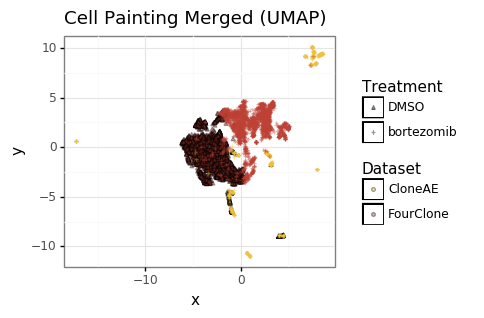

<ggplot: (304563741)>

In [21]:
# Visualize UMAP results
merged_umap_gg = (
    gg.ggplot(embedding_combined_df)
    + gg.geom_point(
        gg.aes(
            'x', 'y',
            shape="Metadata_treatment",
            fill='Metadata_Dataset'
        ),
        size=1,
        alpha=0.4
    )
    + gg.theme_bw()
    + gg.xlab("x")
    + gg.ylab("y")
    + gg.scale_shape_manual(name="Treatment", values=["^", "+"])
    + gg.scale_fill_manual(name="Dataset", values=["#F0C13E", "#BD4135"])
    + gg.ggtitle("Cell Painting Merged (UMAP)")
    + gg.theme(legend_key=gg.element_rect(color="black", fill = "white"))
)

file = os.path.join("figures", "umap", "clone_compare_batch_effect")
for extension in save_file_extensions:
    merged_umap_gg.save(filename='{}{}'.format(file, extension), height=3, width=3.5, dpi=400)

merged_umap_gg